In [3]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yahooquery as yq
import random

%matplotlib inline
import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

from ConformalMethods import AdaptiveCP, ACP_plots, ACP_data
import pickle

In [4]:
raw_results = pickle.load(open('completion_dict25.pickle', 'rb'))

In [5]:
from pprint import pprint
pprint(raw_results['ACI'].keys())

dict_keys(['coverge', 'width', 'raw_results', 'coverage_mean', 'width_mean'])


In [6]:
def compare_against(method, given_raw_results):
    methods_to_compare = ['ACI','DtACI', 'AwACI', 'AwDtACI', 'MACI', 'HACI_dual_tail', 'HACI_one_side', 'HACI']
    comparitors = len(methods_to_compare) - 1
    
    assert method in methods_to_compare, f'{method} not in {methods_to_compare}'

    methods_to_compare.remove(method)

    comparison_dict = {compare_method: ACP_data.simple_comparison(given_raw_results[method]['raw_results'], given_raw_results[compare_method]['raw_results'])[0] for compare_method in methods_to_compare}

    fig, axs = plt.subplots(comparitors//2 + 1, 2, figsize=(15, 2 * comparitors))
    fig.suptitle(f'Comparison Results when comparing against {method}')

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']  # Add more colors if needed

    for j, (method, comparison) in enumerate(comparison_dict.items()):
        for i, (key, value) in enumerate(comparison.items(), start=0):
            axs[i//2, i%2].axhline(value, label=method, color=colors[j])  # Use different colors for each method
            if j == 0:
                axs[i//2, i%2].set_title(key)
            axs[i//2, i%2].legend()

    plt.tight_layout()  # Increase spacing between the plots
    plt.show()

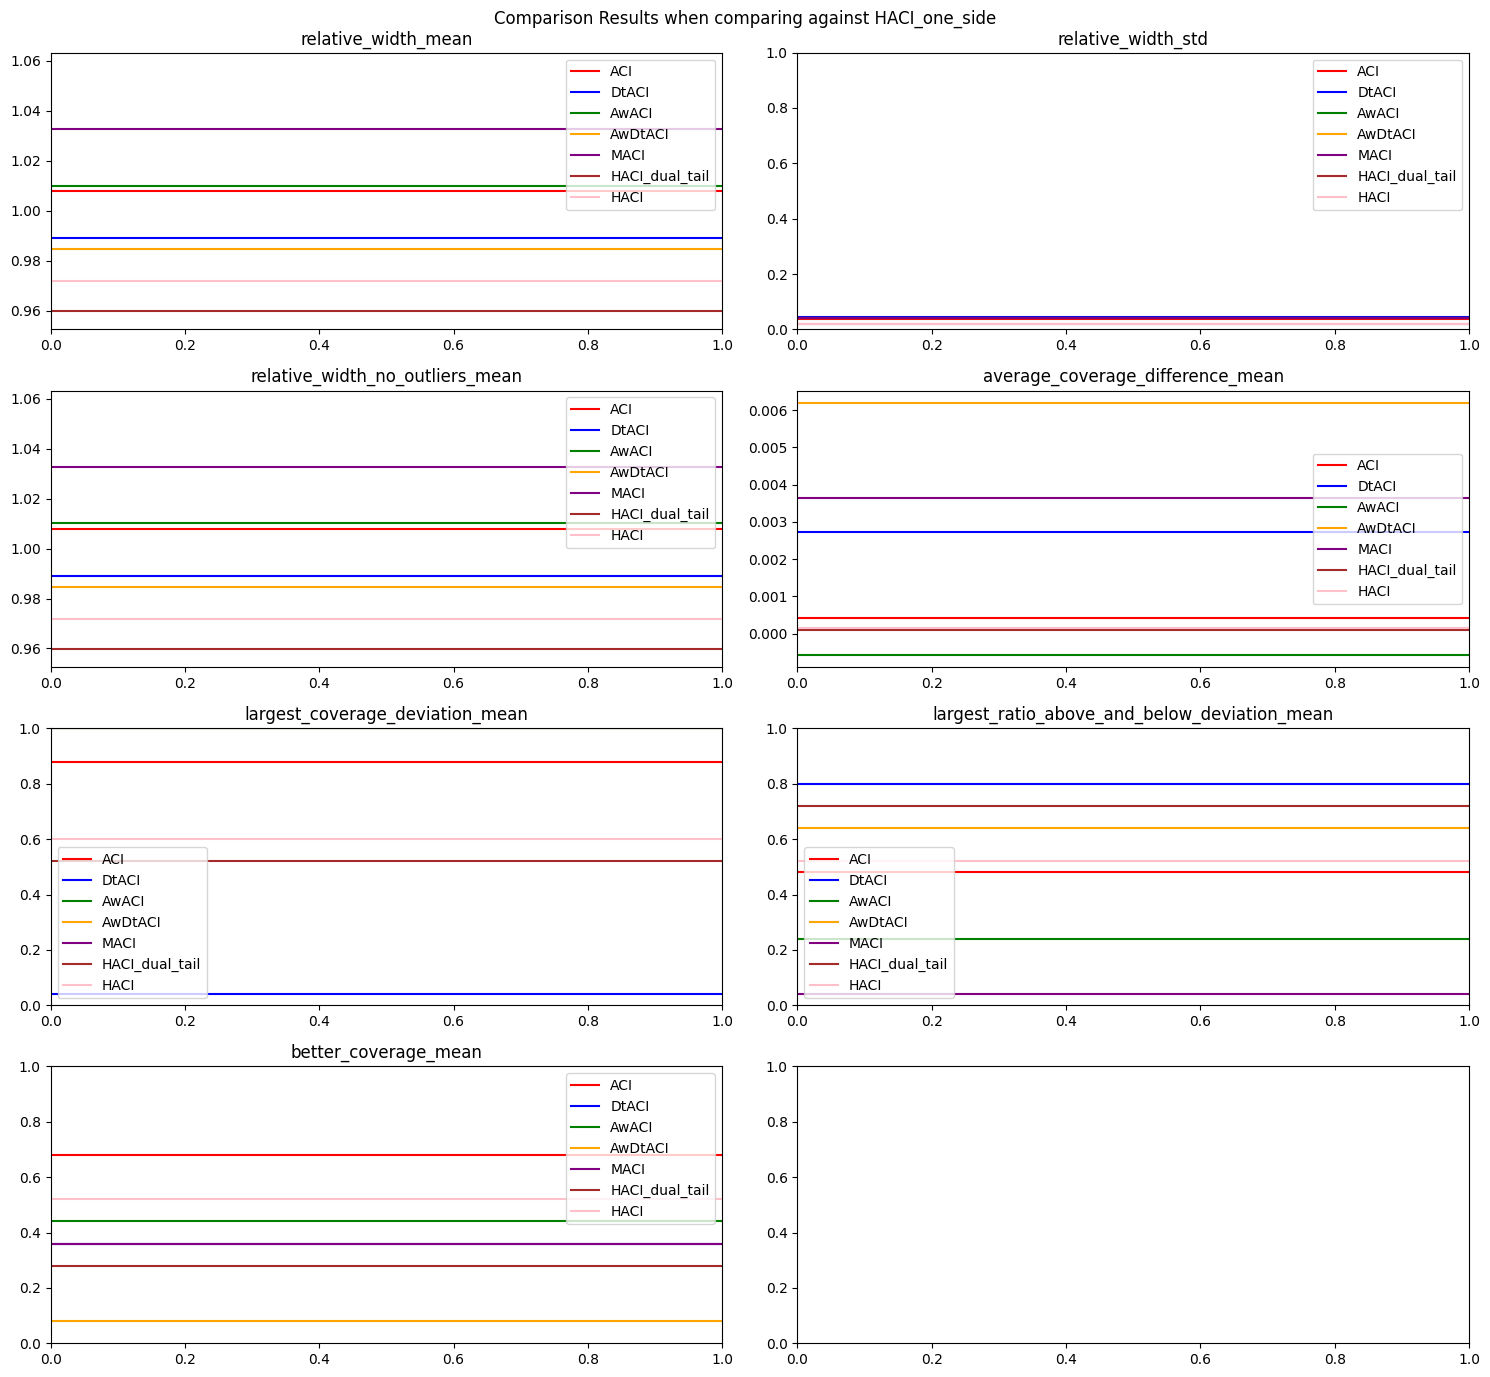

In [15]:
compare_against('HACI_one_side', raw_results)